In [14]:
import os
import re
import numpy as np
import periodictable as pt
import matplotlib.pyplot as plt

from PIL import Image

BASEDIR = "/home/lachlan/CODEBASE/ReadoutXFM/"
TIFDIR = "data/processed_maps/zoe_25um/S1"
IMGBASE = "S1_25um_cali"
EXT='.tiff'
INITELEMENTS=['sum','Compton']

TRUE_ELEMENTS = []

for ptelement in pt.elements:
    TRUE_ELEMENTS.append(ptelement.symbol)



In [19]:
def get_elements(files):

    elements=[]
    keepfiles=[]    

    for fname in files:

        try:
            found=re.search('\-(\w+)\.', fname).group(1)
        except AttributeError:
            print(f"WARNING: no element found in {fname}")
            found=''
        finally:
            if found in TRUE_ELEMENTS:
                elements.append(found)
                keepfiles.append(fname)
            elif found in INITELEMENTS:
                elements.append(found)
                keepfiles.append(fname)
            else:
                print(f"WARNING: Unexpected element {found} not used")

    files = keepfiles
    if len(elements) == len(files):
        zipped = zip(elements, files)    
        zipped_sorted = sorted(zipped)

        elements = [elements for elements, files  in zipped_sorted]
        files = [files for elements, files in zipped_sorted]

    else:
        raise ValueError("mismatch between elements and files")
    

    
    """
    move sum, compton etc at start - does not change files, only elements
    
    for iidx, ivalue in enumerate(INITELEMENTS):
        for idx, value in enumerate(elements):
            if ivalue ==  value:
                elements.remove(ivalue)
        elements.insert(iidx,ivalue)            
    """


    return elements, files

In [20]:

wdir = os.path.join(BASEDIR, TIFDIR)

files = [f for f in os.listdir(wdir) if f.endswith('.tiff')]

elements, files = get_elements(files)

print(elements)
print(files)



['Al', 'As', 'Ca', 'Cl', 'Compton', 'Cr', 'Cu', 'Fe', 'K', 'Mg', 'Mn', 'Mo', 'Na', 'Ni', 'Rb', 'S', 'Si', 'Sr', 'Ti', 'V', 'Zn', 'Zr', 'sum']
['S1_25um_cali-Al.tiff', 'S1_25um_cali-As.tiff', 'S1_25um_cali-Ca.tiff', 'S1_25um_cali-Cl.tiff', 'S1_25um_cali-Compton.tiff', 'S1_25um_cali-Cr.tiff', 'S1_25um_cali-Cu.tiff', 'S1_25um_cali-Fe.tiff', 'S1_25um_cali-K.tiff', 'S1_25um_cali-Mg.tiff', 'S1_25um_cali-Mn.tiff', 'S1_25um_cali-Mo.tiff', 'S1_25um_cali-Na.tiff', 'S1_25um_cali-Ni.tiff', 'S1_25um_cali-Rb.tiff', 'S1_25um_cali-S.tiff', 'S1_25um_cali-Si.tiff', 'S1_25um_cali-Sr.tiff', 'S1_25um_cali-Ti.tiff', 'S1_25um_cali-V.tiff', 'S1_25um_cali-Zn.tiff', 'S1_25um_cali-Zr.tiff', 'S1_25um_cali-sum.tiff']


In [11]:
for i,f in enumerate(files):
        try:
            fid=re.search('\-(\w+)\.', f).group(1)
        except AttributeError:
            print(f"WARNING: {f} not recognised")
            files.pop(i)

print(files)



['S1_25um_cali-Al.tiff', 'S1_25um_cali-As.tiff', 'S1_25um_cali-Ca.tiff', 'S1_25um_cali-Cl.tiff', 'S1_25um_cali-Compton.tiff', 'S1_25um_cali-Cr.tiff', 'S1_25um_cali-Cu.tiff', 'S1_25um_cali-Fe.tiff', 'S1_25um_cali-K.tiff', 'S1_25um_cali-Mg.tiff', 'S1_25um_cali-Mn.tiff', 'S1_25um_cali-Mo.tiff', 'S1_25um_cali-Na.tiff', 'S1_25um_cali-Ni.tiff', 'S1_25um_cali-Rb.tiff', 'S1_25um_cali-S.tiff', 'S1_25um_cali-Si.tiff', 'S1_25um_cali-Sr.tiff', 'S1_25um_cali-Ti.tiff', 'S1_25um_cali-V.tiff', 'S1_25um_cali-Zn.tiff', 'S1_25um_cali-Zr.tiff', 'S1_25um_cali-sum.tiff']


In [12]:
import periodictable as pt

dir(pt.Au)

for name in pt.elements:
    print(name.symbol)

n
H
He
Li
Be
B
C
N
O
F
Ne
Na
Mg
Al
Si
P
S
Cl
Ar
K
Ca
Sc
Ti
V
Cr
Mn
Fe
Co
Ni
Cu
Zn
Ga
Ge
As
Se
Br
Kr
Rb
Sr
Y
Zr
Nb
Mo
Tc
Ru
Rh
Pd
Ag
Cd
In
Sn
Sb
Te
I
Xe
Cs
Ba
La
Ce
Pr
Nd
Pm
Sm
Eu
Gd
Tb
Dy
Ho
Er
Tm
Yb
Lu
Hf
Ta
W
Re
Os
Ir
Pt
Au
Hg
Tl
Pb
Bi
Po
At
Rn
Fr
Ra
Ac
Th
Pa
U
Np
Pu
Am
Cm
Bk
Cf
Es
Fm
Md
No
Lr
Rf
Db
Sg
Bh
Hs
Mt
Ds
Rg
Cn
Nh
Fl
Mc
Lv
Ts
Og


In [13]:






print(wdir)


f = os.path.join(wdir, IMGNAME)

im = Image.open(f)

#im.show()


/home/lachlan/CODEBASE/ReadoutXFM/data/processed_maps/zoe_25um/S1


NameError: name 'IMGNAME' is not defined

289950.06 -5098.2896


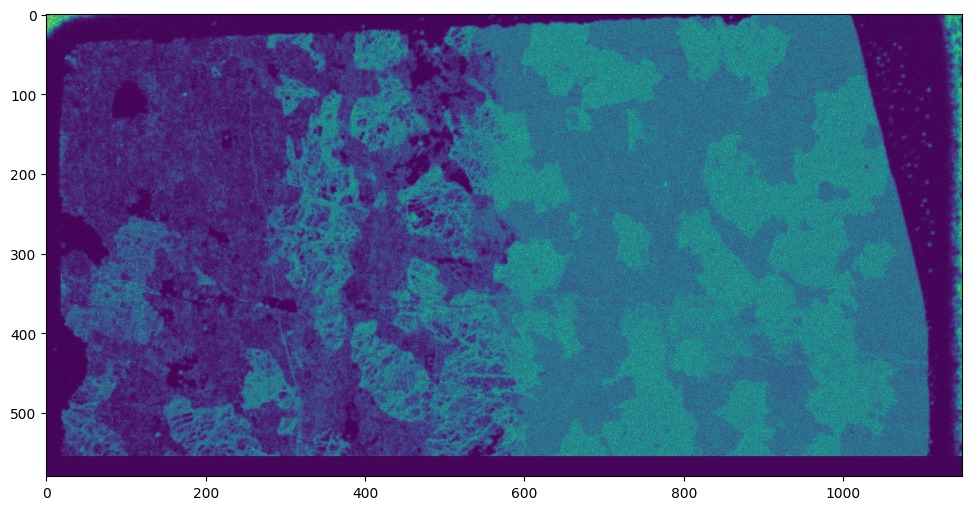

In [ ]:
img = np.array(im)

print(np.max(img), np.min(img))

fig = plt.figure(figsize=(12,6))

ax = fig.add_subplot(111)

display = ax.imshow(img, cmap='viridis')

plt.show()


(580, 1150)


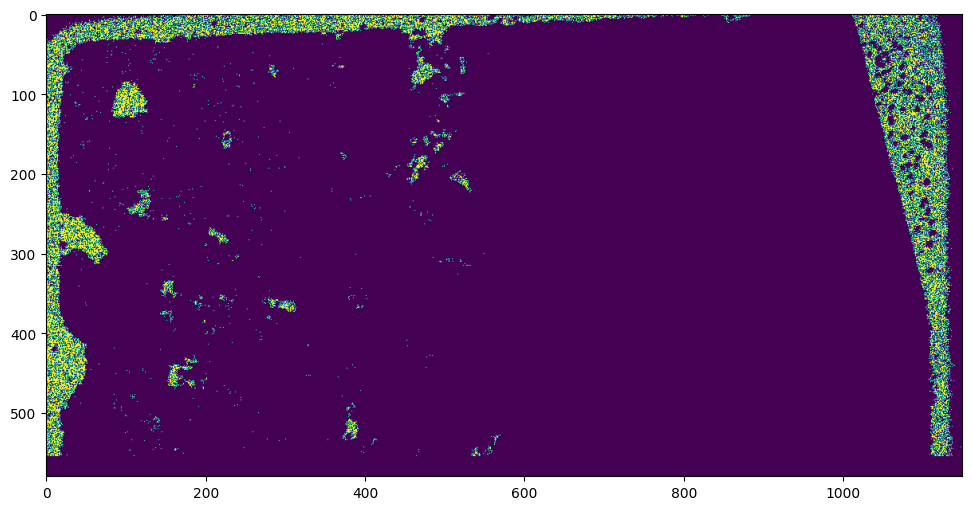

In [ ]:
negs= img < 0

print(img.shape)

fig = plt.figure(figsize=(12,6))

ax = fig.add_subplot(111)

display = ax.imshow(negs, cmap='viridis')

plt.show()